In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model,save_model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
from PIL import Image,ImageOps, ImageFont
from collections import defaultdict
import visualkeras
import cv2

2023-09-13 17:11:53.643775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os

In [14]:
noisy = "Noisy_cropped"
print(sorted(os.listdir(noisy)[1:]))

['1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


In [15]:
clean = "Clean_cropped"
print(sorted(os.listdir(clean)))

['1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


In [16]:
import numpy as np
import cv2

def crop_image_into_patches(image, patch_size):
    
    height, width, channels = image.shape
    patch_height, patch_width = patch_size

    patches = []

    for y in range(0, height, patch_height):
        for x in range(0, width, patch_width):
            patch = image[y:y + patch_height, x:x + patch_width]
            patches.append(patch)

    return patches

# Load your image
k = 0
output_directory = 'clean'
os.makedirs(output_directory, exist_ok=True)

for j in sorted(os.listdir(clean)):
    print(f"{clean}/{j}")
    image = cv2.imread(f"{clean}/{j}")
    
    # Define the patch size (e.g., 64x64)
    patch_size = (400, 400)
    
    # Crop the image into patches
    patches = crop_image_into_patches(image, patch_size)
    
    # Save or process the patches as needed for training your CNN
    for i, patch in enumerate(patches):
        patch_filename = os.path.join(output_directory, f'{k}.png')
        cv2.imwrite(patch_filename, patch)
        k += 1

Clean_cropped/1.png
Clean_cropped/10.png
Clean_cropped/11.png
Clean_cropped/12.png
Clean_cropped/13.png
Clean_cropped/14.png
Clean_cropped/2.png
Clean_cropped/3.png
Clean_cropped/4.png
Clean_cropped/5.png
Clean_cropped/6.png
Clean_cropped/7.png
Clean_cropped/8.png
Clean_cropped/9.png


In [160]:
import numpy as np
import cv2

def crop_image_into_patches(image, patch_size):
    
    height, width, channels = image.shape
    patch_height, patch_width = patch_size

    patches = []

    for y in range(0, height, patch_height):
        for x in range(0, width, patch_width):
            patch = image[y:y + patch_height, x:x + patch_width]
            patches.append(patch)

    return patches

# Load your image
k = 0
output_directory = 'noisy'
os.makedirs(output_directory, exist_ok=True)

for j in sorted(os.listdir(noisy)[1:]):
    print(f"{noisy}/{j}")
    image = cv2.imread(f"{noisy}/{j}")
    
    # Define the patch size (e.g., 64x64)
    patch_size = (400, 400)
    
    # Crop the image into patches
    patches = crop_image_into_patches(image, patch_size)
    
    # Save or process the patches as needed for training your CNN
    for i, patch in enumerate(patches):
        patch_filename = os.path.join(output_directory, f'{k}.png')
        cv2.imwrite(patch_filename, patch)
        k += 1

Noisy_cropped/1.png
Noisy_cropped/10.png
Noisy_cropped/11.png
Noisy_cropped/12.png
Noisy_cropped/13.png
Noisy_cropped/14.png
Noisy_cropped/2.png
Noisy_cropped/3.png
Noisy_cropped/4.png
Noisy_cropped/5.png
Noisy_cropped/6.png
Noisy_cropped/7.png
Noisy_cropped/8.png
Noisy_cropped/9.png


In [161]:
# Directory containing the patches
patch_directory = 'clean'

# Get a list of all files in the directory
patch_files = os.listdir(patch_directory)

# Iterate through each patch file
for patch_file in patch_files:
    patch_path = os.path.join(patch_directory, patch_file)
    
    # Load the patch image using OpenCV
    patch = cv2.imread(patch_path)
    
    # Check if the patch is square (width equals height)
    if patch.shape[0] != patch.shape[1]:
        print(f"Removing non-square patch: {patch_file}")
        
        # Delete the non-square patch file
        os.remove(patch_path)
    else:
        print(f"Keeping square patch: {patch_file}")

Keeping square patch: 176.png
Keeping square patch: 88.png
Keeping square patch: 162.png
Keeping square patch: 189.png
Removing non-square patch: 77.png
Removing non-square patch: 63.png
Keeping square patch: 228.png
Keeping square patch: 200.png
Removing non-square patch: 214.png
Removing non-square patch: 215.png
Keeping square patch: 201.png
Keeping square patch: 229.png
Keeping square patch: 62.png
Keeping square patch: 188.png
Removing non-square patch: 76.png
Removing non-square patch: 163.png
Keeping square patch: 177.png
Keeping square patch: 89.png
Keeping square patch: 149.png
Keeping square patch: 161.png
Removing non-square patch: 175.png
Keeping square patch: 60.png
Keeping square patch: 74.png
Keeping square patch: 48.png
Keeping square patch: 217.png
Removing non-square patch: 203.png
Keeping square patch: 202.png
Keeping square patch: 216.png
Keeping square patch: 49.png
Removing non-square patch: 75.png
Keeping square patch: 61.png
Removing non-square patch: 174.png
Ke

In [162]:
# Directory containing the patches
patch_directory = 'noisy'

# Get a list of all files in the directory
patch_files = os.listdir(patch_directory)

# Iterate through each patch file
for patch_file in patch_files:
    patch_path = os.path.join(patch_directory, patch_file)
    
    # Load the patch image using OpenCV
    patch = cv2.imread(patch_path)
    
    # Check if the patch is square (width equals height)
    if patch.shape[0] != patch.shape[1]:
        print(f"Removing non-square patch: {patch_file}")
        
        # Delete the non-square patch file
        os.remove(patch_path)
    else:
        print(f"Keeping square patch: {patch_file}")

Keeping square patch: 176.png
Keeping square patch: 88.png
Keeping square patch: 162.png
Keeping square patch: 189.png
Removing non-square patch: 77.png
Removing non-square patch: 63.png
Keeping square patch: 228.png
Keeping square patch: 200.png
Removing non-square patch: 214.png
Removing non-square patch: 215.png
Keeping square patch: 201.png
Keeping square patch: 229.png
Keeping square patch: 62.png
Keeping square patch: 188.png
Removing non-square patch: 76.png
Removing non-square patch: 163.png
Keeping square patch: 177.png
Keeping square patch: 89.png
Keeping square patch: 149.png
Keeping square patch: 161.png
Removing non-square patch: 175.png
Keeping square patch: 60.png
Keeping square patch: 74.png
Keeping square patch: 48.png
Keeping square patch: 217.png
Removing non-square patch: 203.png
Keeping square patch: 202.png
Keeping square patch: 216.png
Keeping square patch: 49.png
Removing non-square patch: 75.png
Keeping square patch: 61.png
Removing non-square patch: 174.png
Ke

In [163]:

cleanTrainDir='clean/'
dirtyTrainDir='noisy/'
for nFile,cFile in zip(sorted(os.listdir(dirtyTrainDir)),sorted(os.listdir(cleanTrainDir))):
    if nFile!=cFile:
        print("mismatch")
    else:
        pass

In [164]:
def getImageDataFromFile(file_name,target_size=(200,200)):
    img=load_img(file_name,target_size=target_size)
    gray_img=ImageOps.grayscale(img)
    img_arr=img_to_array(gray_img)
    img_arr=img_arr/255.
    return img_arr

In [165]:
allCleanImgeFiles=[cleanTrainDir+x for x in os.listdir(cleanTrainDir)]
cleanImgFile=allCleanImgeFiles[0]
dirtyImgFile=dirtyTrainDir+cleanImgFile.split('/')[-1]

In [166]:
data=[]
for nImg,cImg in zip(sorted(os.listdir(dirtyTrainDir)),sorted(os.listdir(cleanTrainDir))):
    dirtyImageFile=dirtyTrainDir+nImg
    cleanImageFile=cleanTrainDir+cImg
    
    dirtyImg=getImageDataFromFile(dirtyImageFile,target_size=(400,400))
    cleanImg=getImageDataFromFile(cleanImageFile,target_size=(400,400))
    data.append([dirtyImg,cleanImg])
data=np.array(data)
data.shape

(165, 2, 400, 400, 1)

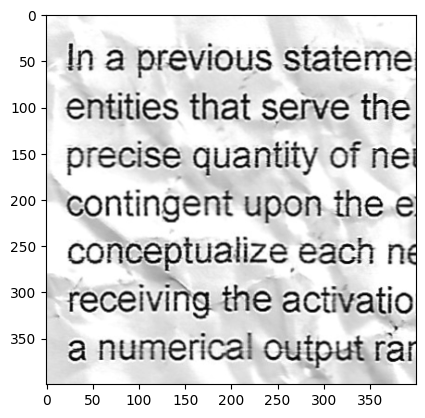

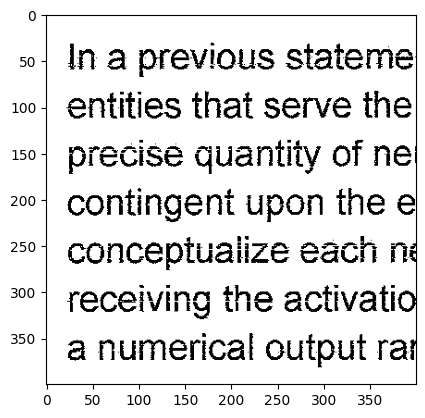

In [168]:
rndIdx=np.random.randint(len(data))
plt.imshow(data[:,0][rndIdx],cmap='gray')
plt.show()
plt.imshow(data[:,1][rndIdx],cmap='gray')

In [3]:
def createAutoEncoderModel():
    inp=Input(shape=(400,400,1))
    #encoder
    x=Conv2D(64, (3, 3), activation='relu', padding='same')(inp)
    x=BatchNormalization()(x)
    x=MaxPooling2D(2)(x)
    x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=MaxPooling2D(2)(x)

    skipper1 = x

    #residual block 1
    x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)

    x = Add()([x, skipper1])
    skipper2 = x

    #residual block 2
    x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)

    x = Add()([x, skipper2])
    
    #decoder
    x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=UpSampling2D((2, 2))(x)
    x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    x=UpSampling2D((2, 2))(x)
    x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x=BatchNormalization()(x)
    out=Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    model=Model(inp,out)
    return model

In [4]:
autoencoder_model=createAutoEncoderModel()
autoencoder_model.summary()

2023-09-13 17:12:30.892425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400, 400, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 400, 400, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 400, 400, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
font = ImageFont.truetype("Arial Unicode.ttf", 32) 

color_map = defaultdict(dict)
color_map[InputLayer]['fill'] = '#a6a6a6'
color_map[Conv2D]['fill'] = '#6dcff6'
color_map[Add]['fill'] = '#82ca9c'
color_map[BatchNormalization]['fill'] = '#f9ad81'
color_map[MaxPooling2D]['fill'] = '#a67c52'
color_map[UpSampling2D]['fill'] = '#f49ac1'

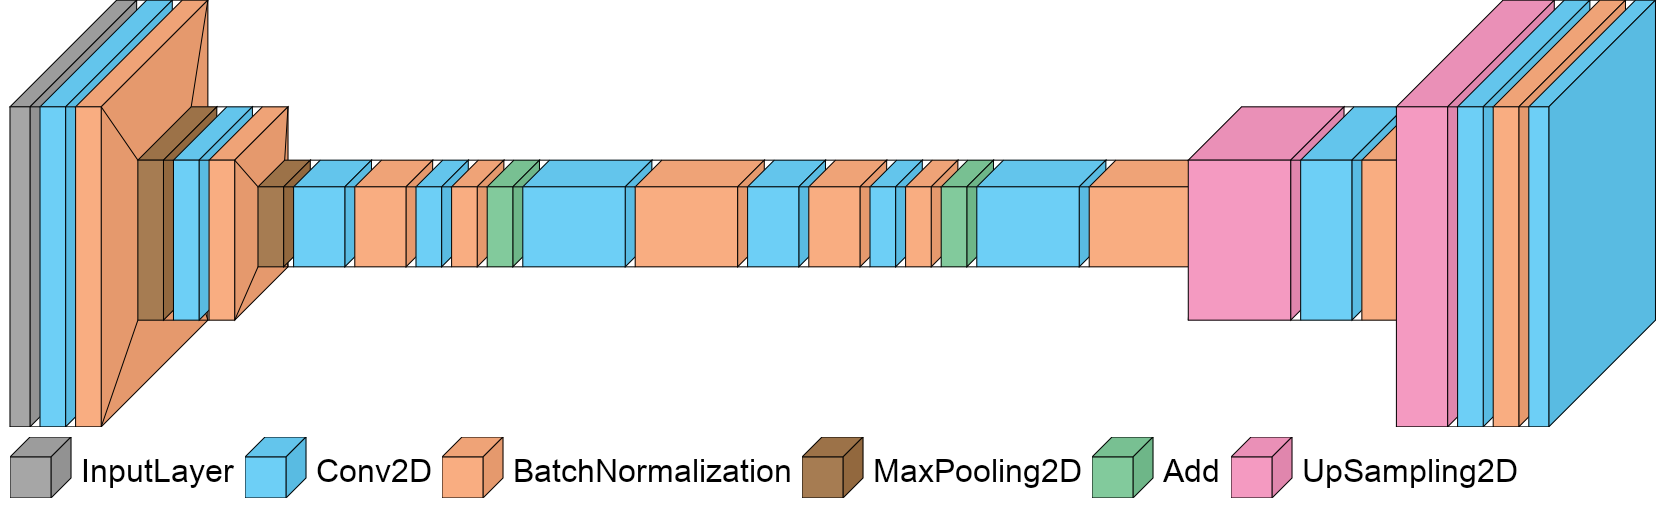

In [12]:
visualkeras.layered_view(autoencoder_model, legend=True,font=font,color_map=color_map, scale_xy=0.8, scale_z=0.4)

In [174]:
import tensorflow.keras.backend as K

def psnr(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))  # Calculate Mean Squared Error
    return -10.0 * K.log(mse) / K.log(10.0)  # Calculate PSNR

autoencoder_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=[psnr])

In [175]:
model_hist=autoencoder_model.fit(data[:,0],data[:,1],epochs=210,batch_size=10,verbose=1,validation_split=0.01)

Epoch 1/210
17/17 [==============================] - 402s 24s/step - loss: 0.7118 - psnr: 6.6248 - val_loss: 0.5408 - val_psnr: 7.5719
Epoch 2/210
17/17 [==============================] - 409s 24s/step - loss: 0.5618 - psnr: 7.4392 - val_loss: 0.5754 - val_psnr: 7.1747
Epoch 3/210
17/17 [==============================] - 373s 22s/step - loss: 0.4839 - psnr: 8.3377 - val_loss: 0.4610 - val_psnr: 8.6017
Epoch 4/210
17/17 [==============================] - 346s 20s/step - loss: 0.3813 - psnr: 9.7662 - val_loss: 0.3942 - val_psnr: 9.5773
Epoch 5/210
17/17 [==============================] - 360s 21s/step - loss: 0.2799 - psnr: 11.4177 - val_loss: 0.3159 - val_psnr: 10.7883
Epoch 6/210
17/17 [==============================] - 366s 21s/step - loss: 0.2168 - psnr: 12.3179 - val_loss: 0.2915 - val_psnr: 11.1040
Epoch 7/210
17/17 [==============================] - 362s 21s/step - loss: 0.1905 - psnr: 12.5911 - val_loss: 0.3108 - val_psnr: 11.0151
Epoch 8/210
17/17 [==============================

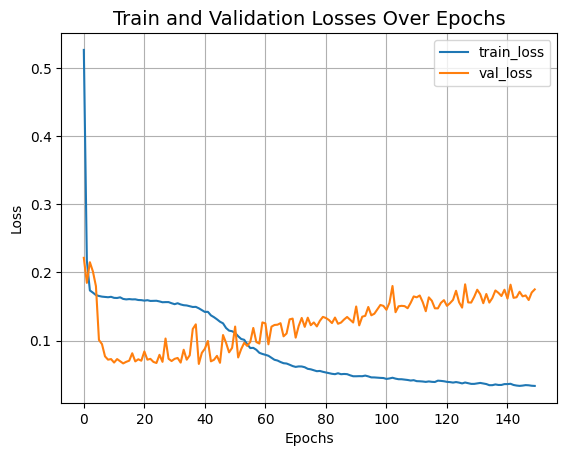

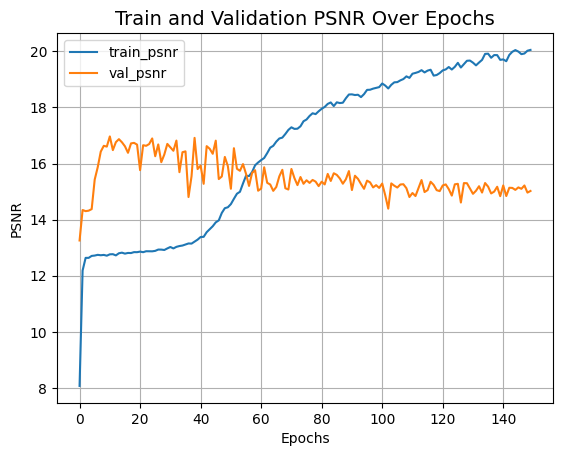

In [109]:
plt.plot(model_hist.history["loss"], label="train_loss")
plt.plot(model_hist.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

plt.plot(model_hist.history["psnr"], label="train_psnr")
plt.plot(model_hist.history["val_psnr"], label="val_psnr")
plt.xlabel("Epochs")
plt.ylabel("PSNR")
plt.title("Train and Validation PSNR Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [ ]:
testImgFile = test_dir+"test2.png"
testImg=getImageDataFromFile(testImgFile,target_size=(400,400))
predictedCleanImage=autoencoder_model.predict(testImg.reshape(1,400,400,1))[0]
print(predictedCleanImage.shape)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
ax.imshow(predictedCleanImage,cmap='gray')

(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 1s 636ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 361ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 372ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 362ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 362ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 364ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 361ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 367ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 367ms/step
(400, 400, 1)
(400, 400, 1) (400, 400, 1)
1/1 [==============================] - 0s 365ms/step
(400, 400, 1)


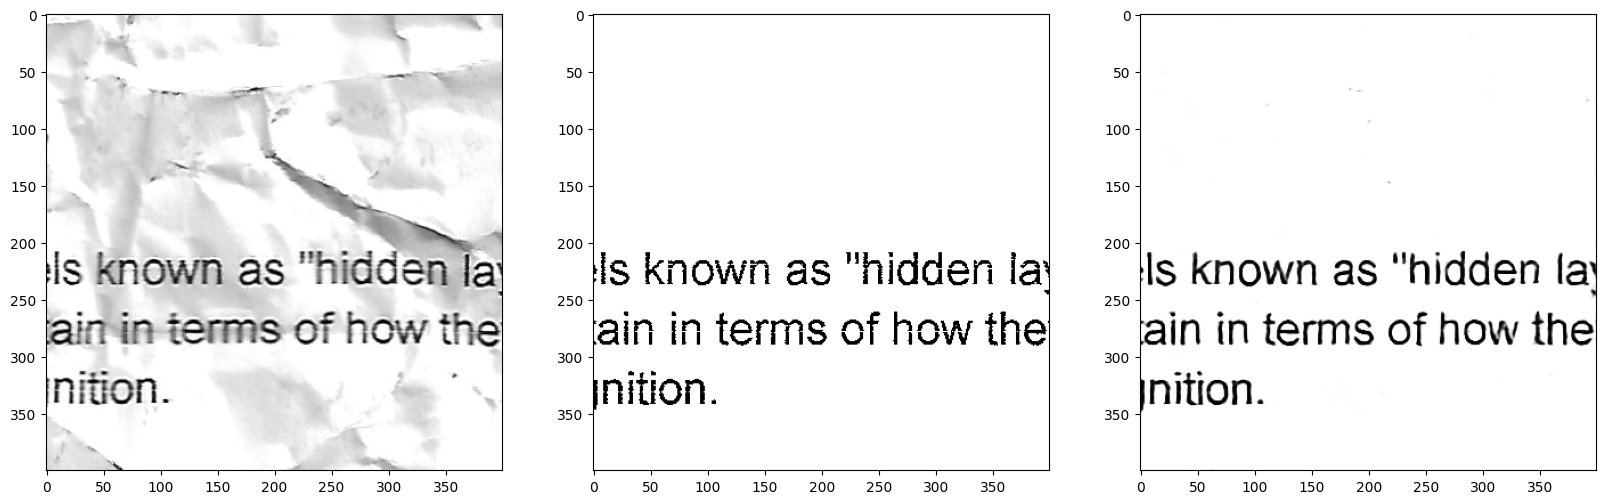

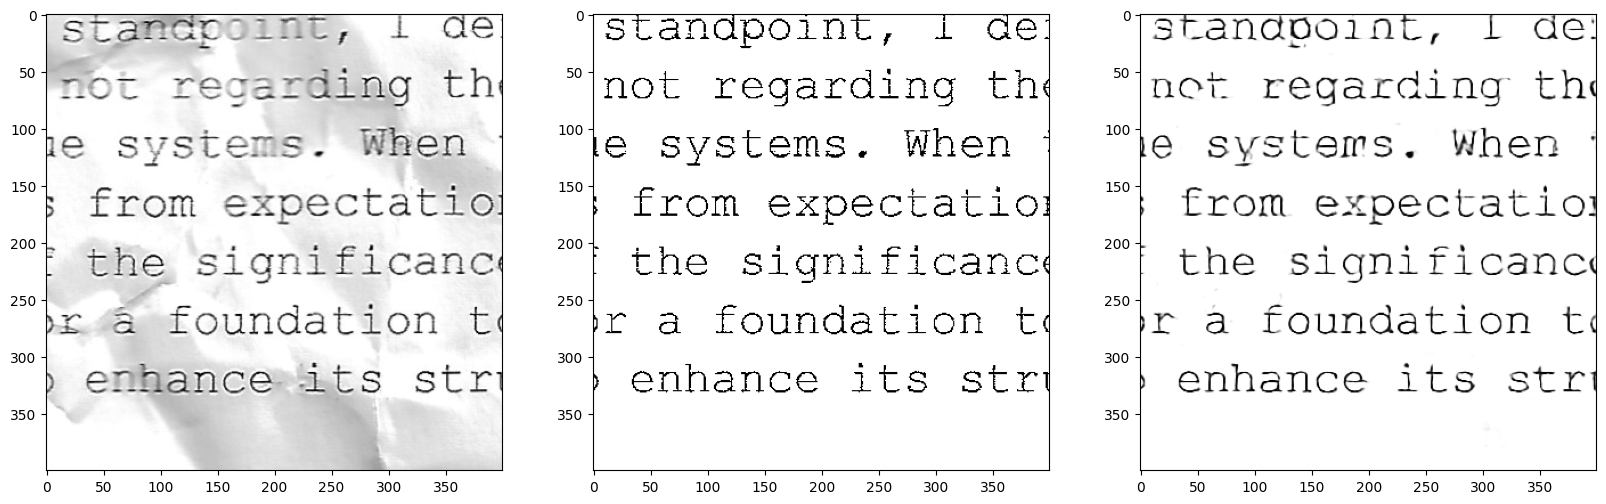

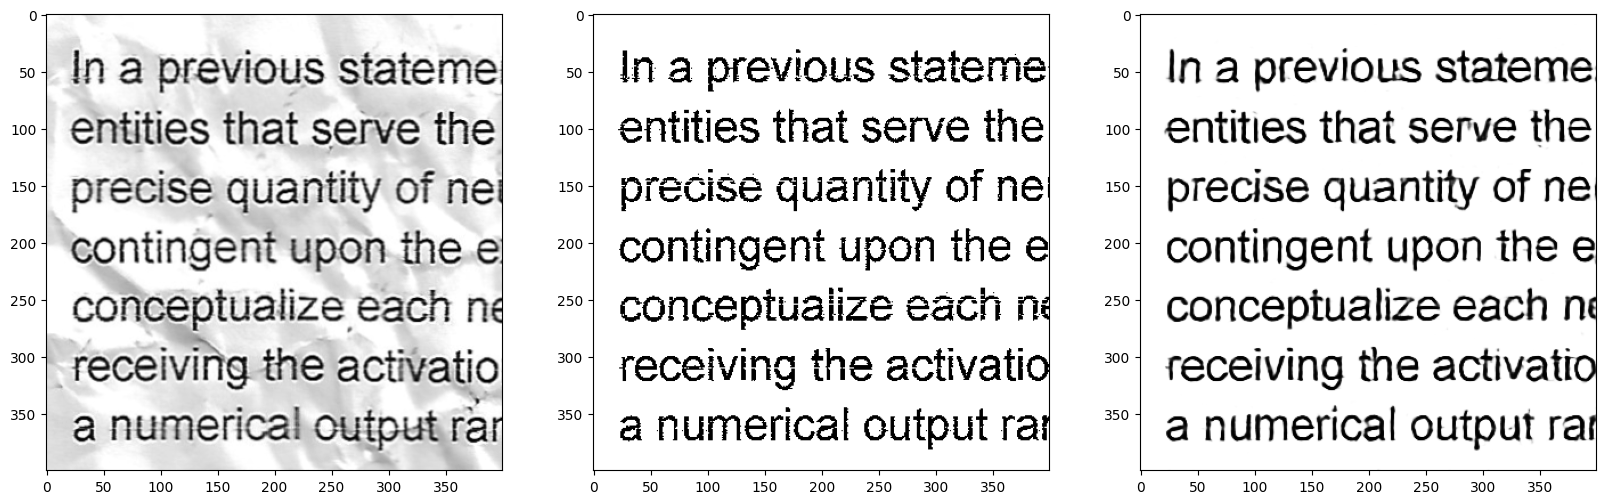

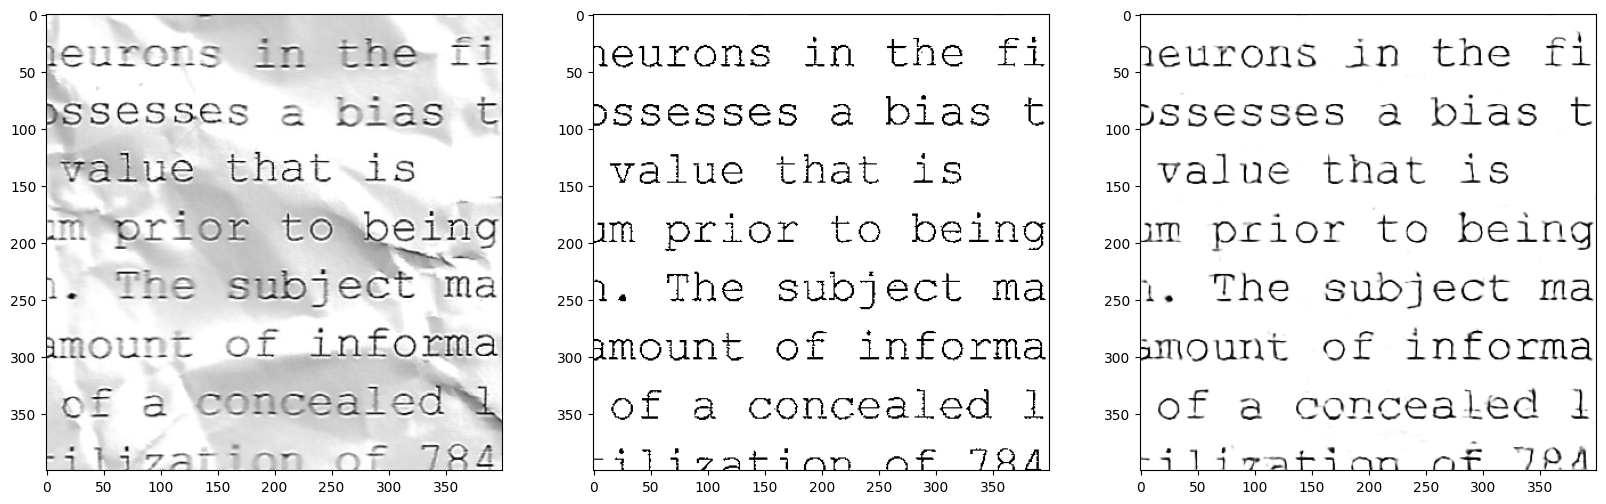

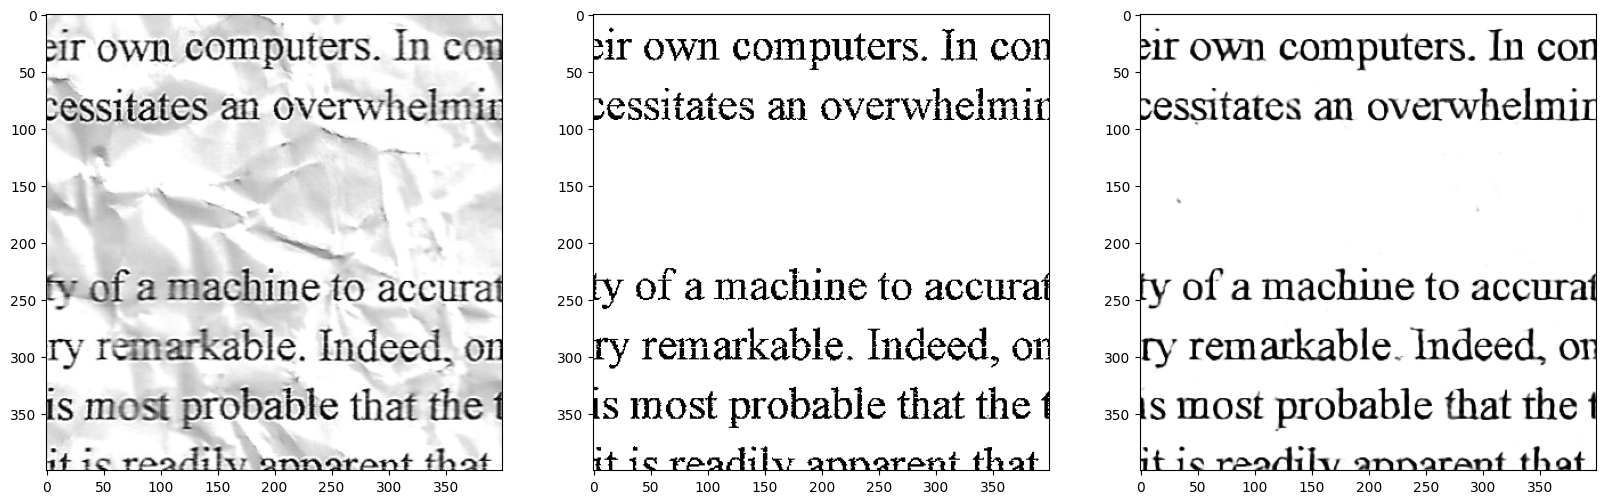

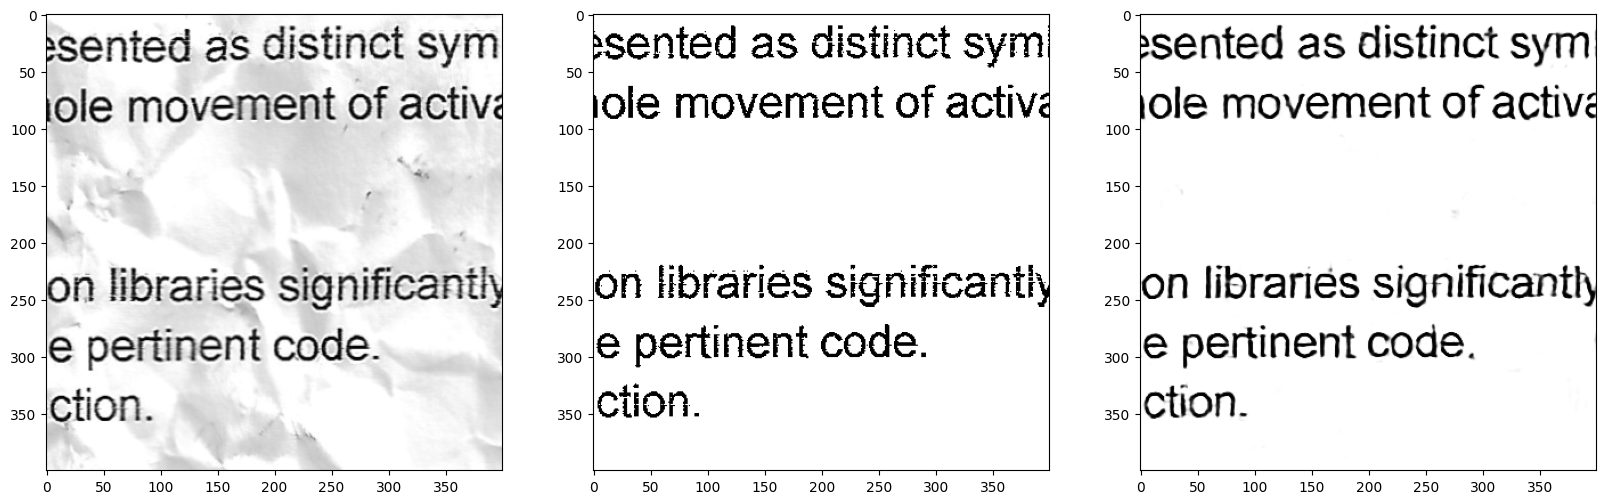

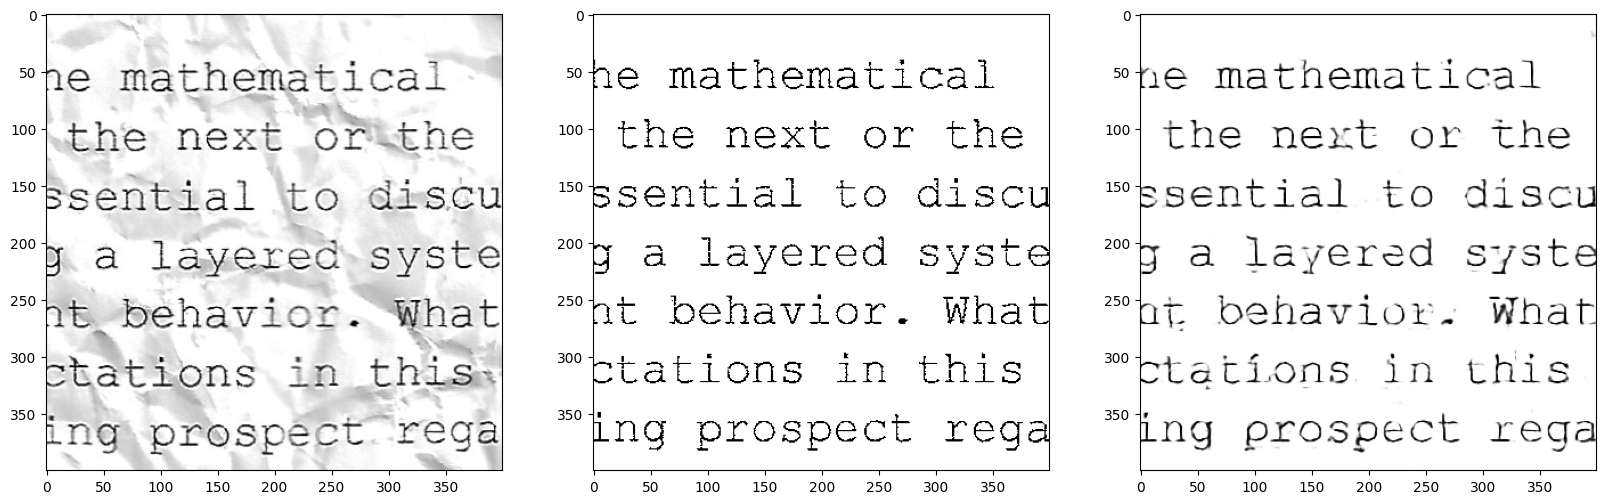

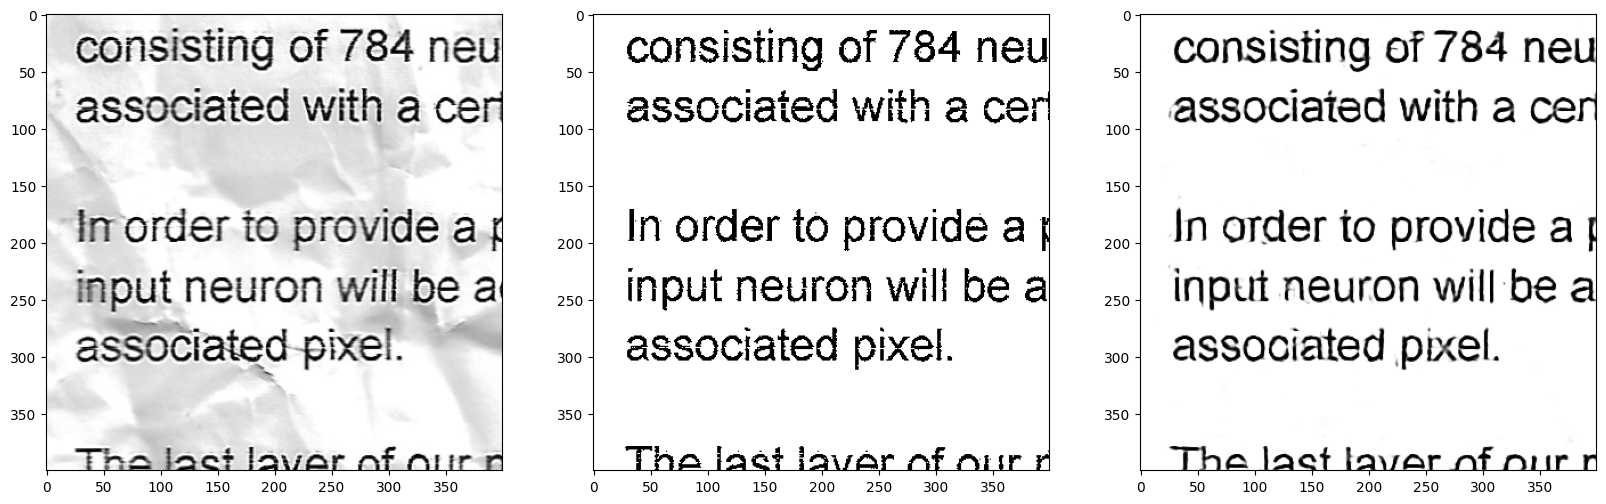

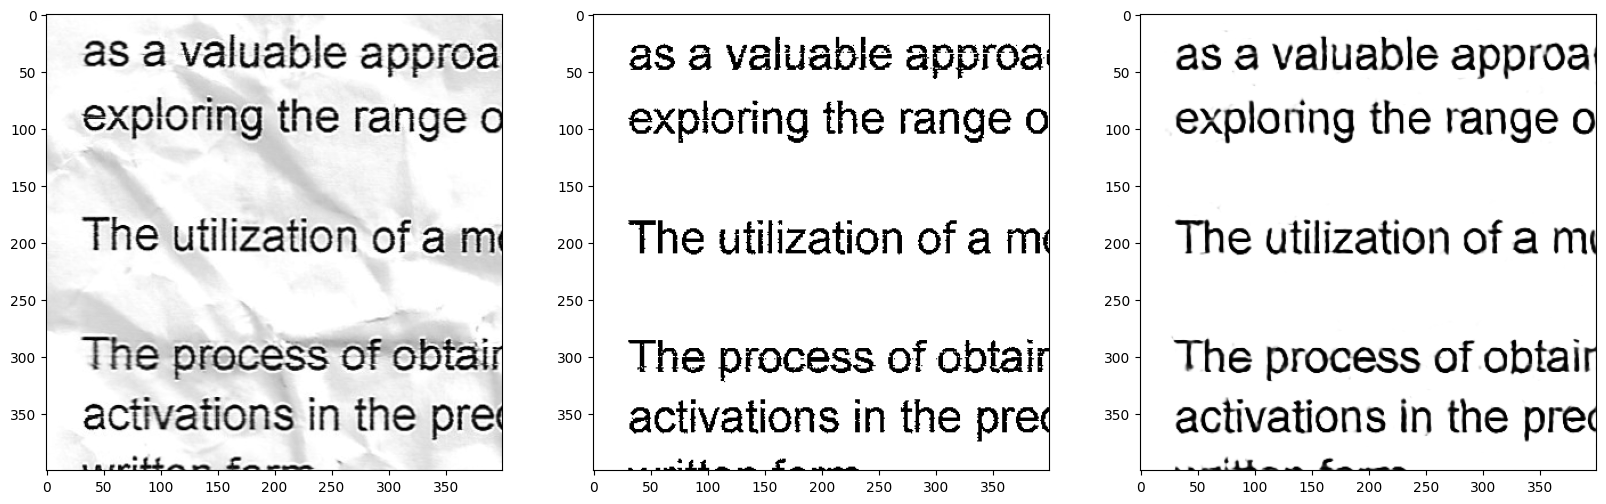

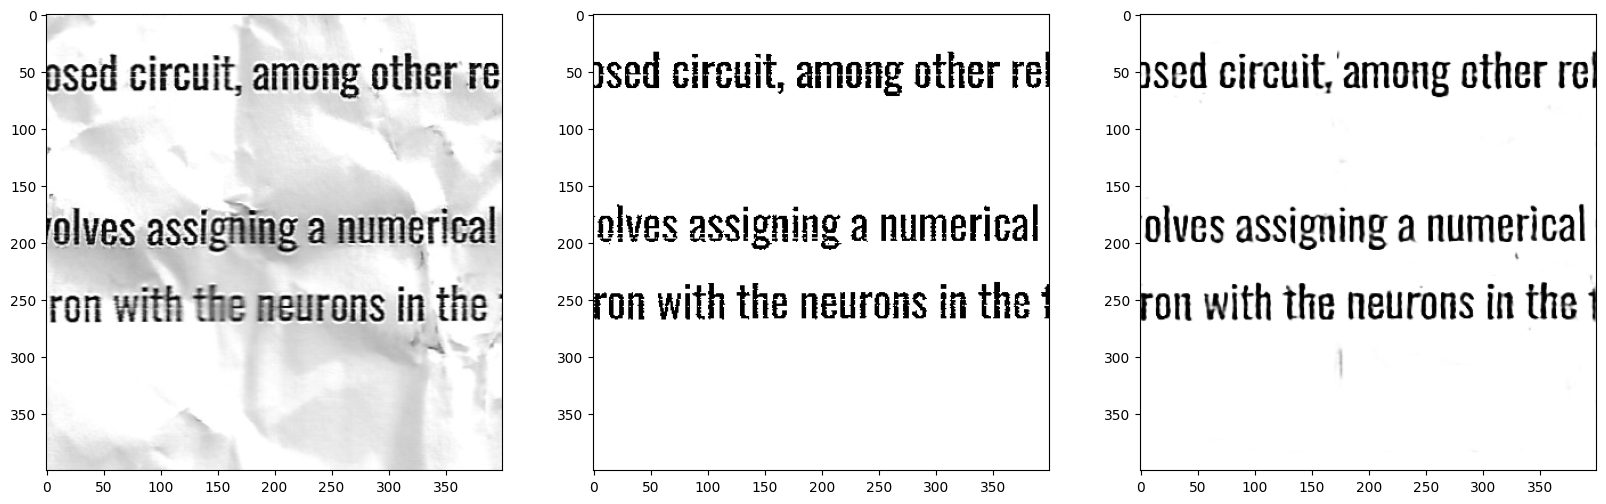

In [176]:
for i in range(10):
    allCleanImgeFiles=[cleanTrainDir+x for x in os.listdir(cleanTrainDir)]

    cleanImgFile=np.random.choice(allCleanImgeFiles)
    dirtyImgFile=dirtyTrainDir+cleanImgFile.split('/')[-1]

    dirtyImg=getImageDataFromFile(dirtyImgFile,target_size=(400,400))
    cleanImg=getImageDataFromFile(cleanImgFile,target_size=(400,400))

    print(dirtyImg.shape,cleanImg.shape)

    predictedCleanImage=autoencoder_model.predict(dirtyImg.reshape(1,400,400,1))[0]
    print(predictedCleanImage.shape)

    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
    ax[0].imshow(dirtyImg,cmap='gray')
    ax[1].imshow(cleanImg,cmap='gray')
    ax[2].imshow(predictedCleanImage,cmap='gray')

In [ ]:
testImgFile = "test.png"
testImg=getImageDataFromFile(testImgFile,target_size=(400,400))
predictedCleanImage=autoencoder_model.predict(testImg.reshape(1,400,400,1))[0]
print(predictedCleanImage.shape)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
ax.imshow(predictedCleanImage,cmap='gray')